<center><h1>Artificial intelligence applied to improve scientific reviews. The antibacterial activity of <i>Cistus</i> plants as a proof of concept.<br>

<center> Francisco Javier Álvarez-Martínez, Fernando Borrás-Rocher, Enrique Barrajón-Catalán and Vicente Micol

<center> <b>Consider citing us if you found this tool useful!</b>

# <a id='0' style=color:black>Table of Contents:</a>

1. [General overview](#1)
2. [Importing libraries](#2)
3. [Data description](#3)
4. [Data preparation](#4)
5. [Data cleaning](#5)
6. [Pre-processing of the texts](#6)
7. [Text analysis of cistus corpus](#7)
8. [Text clustering with K-means](#8)
9. [Find the optimal Number of Clusters](#9)
10. [Auto-tagging based on cluster centers](#10)
11. [Plotting clusters](#11)
12. [Distribution of clusters over the last 20 years](#12)
13. [Conclusion](#13)

# <a id='1' style=color:black>1. General overview</a>

<p style='text-align: justify;'>
<i>Cistus</i> is a genus of angiosperm plants of the cistaceae family, known as jaras, jaguarzos or steppes. They usually form part, sometimes important, of the Mediterranean garrigue, and some species behave as pioneers in the recovery of degraded soils. They are pyrophilic, their germination is favored by fire, and recurrent fires help their permanence by eliminating competition from other plants that would end up displacing them from the biotopes. Several plants of the <i>Cistus</i> genus, such as <i>Cistus salviifolius</i>, <i>Cistus ladanifer</i>, or <i>Cistus albidus</i>, among others, have been extensively studied in recent years due to their molecular composition and biological activity. Plants of the <i>Cistus</i> genus have been shown to possess antioxidant, antimicrobial, antitumor or metabolic syndrome regulatory capacity, among others.
<br><br>To the best of our knowledge, there is no literature review on the properties of plants of the <i>Cistus</i> genus made through the use of artificial intelligence applied to language processing.
<br><br><b>The aim of this study:</b>
<br>To analyze Scopus abstracts in order to highlight the various topics of <i>Cistus</i> research, going deeper into those related to its biological activity.<br>
<br><b>The specific aims are:</b>
<br>To use K-mean technique in order to categorize groups of research articles. This will allow to explore whether the information used in Scopus abstracts reflects the key concepts and the current understanding of <i>Cistus</i> uses.<br>
<br>To observe the trends of <i>Cistus</i> research over the past years based on Scopus abstracts of papers related to <i>Cistus</i>, which would indicate general trends of research efforts.
</p>

[Back to top](#0)

In [6]:
#@title <b><font color="blue" size="+2">Configuring the system...
%%capture
from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

# <a id='2' style=color:black>2. Importing Libraries</a>

In [7]:
# Data Structures
import pandas as pd
import numpy as np
#import nbib

# Corpus Processing
!pip install unidecode
import re
import nltk.corpus
from nltk.corpus                      import stopwords
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from sklearn                          import preprocessing
import string
import joblib
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud                        import WordCloud
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[Back to top](#0)

# <a id='3' style=color:black> 3. Data description</a>
<p style='text-align: justify;'>
Abstracts of the scientific publications that focusing on Cistus were searched and downloaded from Scopus, a free online Elsevier's abstract and citation database launched in 2004 (<a href="https://pubmed.ncbi.nlm.nih.gov/" target="_blank">https://www.scopus.com/search/form.uri?display=basic#basic</a>).
<br><br>Retrieved studies had to contain in their title the word “Cistus”.

</span>
<br><br>According to the search strategy, a total of 1601 papers were included.
<br><br>The results include various type of articles such as reviews, meta-analysis, survey, reports, research articles - academic and clinical research.
</p>

In the case of patent analysis, these were obtained from the Espacenet database (https://worldwide.espacenet.com).

[Back to top](#0)

# <a id='4' style=color:black>4. Data Preparation</a>
<p style='text-align: justify;'>
We downloaded the abstracts from the Scopus website to one csv file which its name is 'cistus.csv'.
<br>This file contains paragraphs of the abstracts category and their meta-information such as: authors, journal, year published, etc., that is, unstructured data.
<br>We will take this file and convert it to a Microsoft Excel compatible xlsx file to facilitate further analysis of the data. The final file name is cistus.xlsx.
</p>

In [10]:
#@title <b><font color="blue" size="+2"> Uploading xlsx file
from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

with Capturing() as output:
    print('Comenzamos....')
name_file = 'Investigacion Clinica con IA generativa.xlsx'  #@param {type: "string"}
link_gdrive = 'https://docs.google.com/spreadsheets/d/1vye9OssHGK54aF4vUT_lDnJ-ei9IUjvc2vjg-lD6ISk/edit?usp=sharing'  #@param {type: "string"}
with Capturing(output) as output:
    id_gdrive=link_gdrive[39:72]
    with open('getfile.txt', 'w') as writefile:
        writefile.write("--load-cookies /tmp/cookies.txt \"https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \'https://docs.google.com/uc?export=download&id=FILEID\' -O- | sed -rn \'s/.*confirm=([0-9A-Za-z_]+).*/\1\\n/p\')&id=")
        writefile.write(id_gdrive)
        writefile.write("\" -O ")
        writefile.write(name_file)
        writefile.write(" && rm -rf /tmp/cookies.txt")
    with open('getfile.txt', 'r') as testwritefile:
        variable=testwritefile.read()
    !wget {variable}
    print("xls file uploaded")

if output[-1]=='xls file uploaded':
    print(output[-1])
else:
    print(output[:-2])

df=pd.read_excel(name_file,sheet_name=0, engine='openpyxl')

xls file uploaded


BadZipFile: File is not a zip file

In [12]:
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,"Workum, J.D.; Meyfroidt, G.; Bakker, J.; Jung,...","Workum, Jessica D. (56080028300); Meyfroidt, G...",56080028300; 24338692600; 55546252100; 5488656...,AI in critical care: A roadmap to the future,2026,Journal of Critical Care,91,NaN,155262,NaN,...,10.1016/j.jcrc.2025.155262,https://www.scopus.com/inward/record.uri?eid=2...,Artificial intelligence (AI) has the potential...,AI readiness; Generative artificial intelligen...,artificial intelligence; clinical decision sup...,Review,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105016511823
1,"Gultepe, E.; Valluru, R.; Brown, N.B.; Sridhar...","Gultepe, Evin (16238715900); Valluru, Raghnya ...",16238715900; 60106061800; 57221354534; 5721074...,The landscape of nanomedical clinical trials,2026,Nano Today,66,NaN,102898,NaN,...,10.1016/j.nantod.2025.102898,https://www.scopus.com/inward/record.uri?eid=2...,"Nanotechnology has transformed healthcare, lea...",AACT; Clinical trials; Covid; Nanohealth; Nano...,Diseases; Information systems; Translation (la...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105016463731
2,"Liu, Z.; Yang, T.; Wang, J.; Chen, Y.; Gao, Z....","Liu, Zhi (57867854600); Yang, Tao (56972907000...",57867854600; 56972907000; 59939682400; 5876234...,Tianyi: A traditional Chinese medicine all-rou...,2026,Information Fusion,126,NaN,103663,NaN,...,10.1016/j.inffus.2025.103663,https://www.scopus.com/inward/record.uri?eid=2...,"Natural medicines, particularly traditional Ch...",Large language model; Progressive training; TC...,Benchmarking; Deep learning; Diagnosis; Learni...,Article,Final,NaN,Scopus,2-s2.0-105014920965
3,"Ahmed, I.; Ahmad, M.; Abdellah, A.; Jeon, G.","Ahmed, Imran (58776130700); Ahmad, Misbah (572...",58776130700; 57208081360; 55666436200; 5994392...,From data to diagnosis: AI-driven multi-modal ...,2026,Information Fusion,126,NaN,103527,NaN,...,10.1016/j.inffus.2025.103527,https://www.scopus.com/inward/record.uri?eid=2...,Brain tumour is one of the most significant ch...,Brain tumour; Generative Adversarial Networks ...,Artificial intelligence; Brain; Clinical resea...,Article,Final,NaN,Scopus,2-s2.0-105012296845
4,"Lee, J.; Cho, J.; Ryu, J.; Kim, S.","Lee, Junyong (60133849900); Cho, Jeihee (59533...",60133849900; 59533576600; 60133883200; 5594937...,Aligning Multimodal Large Language Models with...,2026,Lecture Notes in Computer Science,16147 LNCS,NaN,NaN,331,...,10.1007/978-3-032-06004-4_33,https://www.scopus.com/inward/record.uri?eid=2...,Recent advancements in Multimodal Large Langua...,AI-Assisted Medical Decision-Making; Medical V...,Artificial intelligence; Behavioral research; ...,Conference paper,Final,NaN,Scopus,2-s2.0-105018304149


In [13]:
len(df)

670

In [14]:
print("Columns names:\n", df.columns)

Columns names:
 Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')


[Back to top](#0)

# <a id='5' style=color:black>5. Data Cleaning</a>

## Drop unnecessary columns

Since the goal of this analysis is to perform text analysis and clustering modeling, we will focus only on the text data from each title and abstract, discarding other metadata columns.

In [15]:
df_final=df.copy()
df=df[['Title', 'Year','Abstract']]

In [16]:
df.head()

,Title,Year,Abstract
0,AI in critical care: A roadmap to the future,2026,Artificial intelligence (AI) has the potential...
1,The landscape of nanomedical clinical trials,2026,"Nanotechnology has transformed healthcare, lea..."
2,Tianyi: A traditional Chinese medicine all-rou...,2026,"Natural medicines, particularly traditional Ch..."
3,From data to diagnosis: AI-driven multi-modal ...,2026,Brain tumour is one of the most significant ch...
4,Aligning Multimodal Large Language Models with...,2026,Recent advancements in Multimodal Large Langua...


[Back to top](#0)

## Remove missing values
As one can see from the following command, there are no missing values in any of the columns.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     670 non-null    object
 1   Year      670 non-null    int64 
 2   Abstract  670 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.8+ KB


[Back to top](#0)

## Save and Load (optionally)

### Saving data to CSV file
One can choose to save the dataframe in .csv files for faster access during computational analyses.<br>
We'll use pandas to save the DataFrame to csv file

In [18]:
#df.to_csv('cistus_abstracts_clean.csv')
# Uncomment the following to save the file

### Loading data

We'll use pandas to read the csv file contaning the titles and abstracts for each PMID.


In [19]:
#df = pd.read_csv('cistus_abstracts_clean.csv')
#df.head()
# Uncomment the following to load cistus abstracts data

[Back to top](#0)

# <a id='6' style=color:black>6. Pre-processing of the texts</a>

## The corpus
The 'abstract' and 'title' columns fetched from Scopus contain words in the format of sentences, therefore the data require pre-processing prior to text analysis.
First, the abstracts and titles columns should be extracted and connected.

In [20]:
corpus = df['Title']+df['Abstract']
corpus = corpus.tolist()
print(len(corpus))
contador=0
for entrada in corpus:
    if type(entrada) == str:
        contador+=1
print(contador)

670
670


In this stage we will convert unstructured text data into normalized and structured data using the Python NLTK (Natural Language Toolkit) library.
<br><br>
The text data pre-processing involves three steps:<br>
1) noise removal<br>
2) normalization<br>
3) tokenization<br>

[Back to top](#0)

## Noise removal

Data cleaning of our corpus done with processCorpus function will:

1. Lowercase the text.
2. Remove all words that don't contribute to the semantic meaning of the text (words that are not within the english alphabet (i.e e-mails and URLs).
3. Remove punctuation.
4. Remove numbers.
5. Remove stop words. The stop words are the most common words used in a language. In English, common stop words include “the”, “a”, “is”, “what“, “will“, “you“ etc. stop words also conclude connecting words that connect ideas together, for example, “and”, “but” and “so”.
6. Remove costum stop words that we define. The list conlude generic words that appear in the abstracts like: “abstract“, “background“, “results“, and “conclusions“.
7. Replace costum synonyms words that we define to avoid ambiguous terms.
8. Remove any words composed of less than 2 or more than 21 letters.
9. Remove any excess white spaces.
10. Return clean list.


In [21]:
# Handling unwanted Symbols and Words
!wget https://raw.githubusercontent.com/F-J-A-M/AI_language_processing/main/stop_words_1.txt
def processCorpus(corpus):

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords_costum = [line.rstrip('\n') for line in open('stop_words_1.txt')] # Load .txt file line by line
    #syn_dict = {'women':'woman','female':'woman','men':'man','male':'man','children':'child','infants child':'infant','infants':'infant', }
    #syn_keys=list(syn_dict.keys())

    for index, abstract in enumerate(corpus):

        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        corpus[index] = corpus[index].replace(u'\ufffd', '')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(u'\xa0', u'')    # remove '\xa0' a non-breaking space in Latin1 (ISO 8859-1)


        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words

        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        for c in string.punctuation:                            # Remove punctuation
            corpus[index]= corpus[index].replace(c," ")


        #corpus[index] = re.sub(r'young adult', 'young', corpus[index])
        #corpus[index] = re.sub(r'first time', 'firsttime', corpus[index])
        #corpus[index] = re.sub(r'over time', 'overtime', corpus[index])
        #corpus[index] = re.sub(r'life time', 'lifetime', corpus[index])

        #for syn in syn_keys:
        #    corpus[index]=corpus[index].replace(syn, syn_dict[syn]) # replace synonyms


        corpus[index] = re.sub(' +', ' ', corpus[index])            # Remove Additional Spaces

        corpus[index] = ''.join(i for i in corpus[index] if not i.isdigit())  # removes numbers

        listOfTokens = word_tokenize(corpus[index])

        # removes a list of words (stopwords) from a tokenized list.
        listOfTokens = [w for w in listOfTokens if not w in stopwords]
        # removes a list of words (costom_words) from a tokenized list.
        listOfTokens = [w for w in listOfTokens if not w in stopwords_costum]

        # removes any words composed of less than 2 or more than 21 letters
        twoLetterWord = twoLetters(listOfTokens)
        listOfTokens = [w for w in listOfTokens if not w in twoLetterWord]

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

# removing any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) < 3 or len(token) >21:
            twoLetterWord.append(token)
    return twoLetterWord



--2025-11-02 16:15:37--  https://raw.githubusercontent.com/F-J-A-M/AI_language_processing/main/stop_words_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\W'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-3540447020.py:12: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
/tmp/ipython-input-3540447020.py:20: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
/tmp/ipython-input-3540447020.py:21: SyntaxWarning: invalid escape sequence '\W'
  corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words


200 OK
Length: 7281 (7.1K) [text/plain]
Saving to: ‘stop_words_1.txt’

stop_words_1.txt    100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-11-02 16:15:37 (14.2 MB/s) - ‘stop_words_1.txt’ saved [7281/7281]



In [22]:
# Display the results before we apply processCorpus function
corpus[18]

'Convergence of evolving artificial intelligence and machine learning techniques in precision oncologyThe confluence of new technologies with artificial intelligence (AI) and machine learning (ML) analytical techniques is rapidly advancing the field of precision oncology, promising to improve diagnostic approaches and therapeutic strategies for patients with cancer. By analyzing multi-dimensional, multiomic, spatial pathology, and radiomic data, these technologies enable a deeper understanding of the intricate molecular pathways, aiding in the identification of critical nodes within the tumor’s biology to optimize treatment selection. The applications of AI/ML in precision oncology are extensive and include the generation of synthetic data, e.g., digital twins, in order to provide the necessary information to design or expedite the conduct of clinical trials. Currently, many operational and technical challenges exist related to data technology, engineering, and storage; algorithm devel

In [23]:
import nltk
nltk.download('punkt_tab')
corpus = processCorpus(corpus)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
# Check the results of processCorpus function
corpus[18]

'convergence evolving artificial intelligence machine learning techniques precision oncologythe confluence technologies artificial intelligence machine learning analytical techniques rapidly advancing field precision oncology promising improve diagnostic approaches therapeutic strategies cancer analyzing multi dimensional multiomic spatial pathology radiomic technologies enable deeper understanding intricate molecular pathways aiding critical nodes tumor biology optimize treatment applications precision oncology extensive include generation synthetic digital twins order provide expedite conduct clinical operational technical challenges exist technology engineering storage algorithm development structures quality quantity analytical pipeline sharing generalizability incorporation technologies clinical workflow reimbursement elsevier rights reserved'

[Back to top](#0)

## Normalizing the text

Normalizing of our corpus will be done with normalizeCorpus function.

Normalization refers to stemming. Stemming is a technique that reduces a word to it's root. <br>
The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words study, studies and studying stems into studi, which is not an English word. But its allow to keep all of the remaining words in the simplest format possible, so we can apply a function that gives weights to each word.

Returns normalized list.

In [25]:
# Normalizing the text
def normalizeCorpus(corpus):
    param_stemmer = SnowballStemmer('english')
    for index, document in enumerate(corpus):

        listOfTokens = word_tokenize(corpus[index])
        # applies stemming to a list of tokenized words
        listOfTokens = [param_stemmer.stem(w) for w in listOfTokens]
        # removes any words composed of less than 2 or more than 21 letters
        twoLetterWord = twoLetters(listOfTokens)
        listOfTokens = [w for w in listOfTokens if not w in twoLetterWord]
        corpus[index]   = " ".join(listOfTokens)
    return corpus

In [26]:
corpus = normalizeCorpus(corpus)

In [27]:
# Check the results of normalizeCorpus function
corpus[18]

'converg evolv artifici intellig machin learn techniqu precis oncologyth confluenc technolog artifici intellig machin learn analyt techniqu rapid advanc field precis oncolog promis improv diagnost approach therapeut strategi cancer analyz multi dimension multiom spatial patholog radiom technolog enabl deeper understand intric molecular pathway aid critic node tumor biolog optim treatment applic precis oncolog extens includ generat synthet digit twin order provid expedit conduct clinic oper technic challeng exist technolog engin storag algorithm develop structur qualiti quantiti analyt pipelin share generaliz incorpor technolog clinic workflow reimburs elsevi right reserv'

[Back to top](#0)

## Tokenizing the text
Tokenization is used to split the sentences into words (tokenization).<br>
This stage concluded in the following function - TfidfVectorizer, which among other things, convert a collection of text documents to a matrix of tokens.

[Back to top](#0)

## Feature weighting

In this stage we will convert the tokenized abstracts into a matrix that will serve as an input for clustering model. This process is referred to “vectorization”.

The tokenized object will be vectorized using the Term Frequency - Inverse Document Frequency (TF-IDF) method. The TF-IDF is a feature Statistical weighting of Words algorithm that calculate the importance of words in each abstract relative to what is in that abstract but also relative to all the abstracts in the corpus. This normalization increases the importance of words that appear multiple times in the same abstract while decreasing the importance of words that appear in many abstracts (which would mostly be generic terms). TF-IDF give each word in an abstract a score that ranges from zero to one.

TFIDF Vectorizer (TfidfVectorizer) will be used with its default parameters.

The final corpus is a feature matrix.

In [28]:
# Function that runs the TF-IDF function and returns a vector and dataframe of  weighting words
def TfidFun(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    tf_final = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

    return X, tf_final, vectorizer

[Back to top](#0)

# <a id='7' style=color:black>7. Text analysis of cistus corpus</a>

In this section we will use exploratory analysis tools to aggregate and visualize the text data associated with cistus.
<br>

We’ll make a bar plot and word cloud using matplotlib the wordcloud package to get a visual representation of the most frequent occurring words in the abstracts that were related to cistus.

In [29]:
# Join all abstracts together
corpuse_all=[(" ".join(corpus))]
corpuse_all

['critic care roadmap futureartifici intellig potenti revolution critic care medicin enhanc care improv resourc alloc reduc clinician workload promis applic remain confin integr everyday clinic practic manuscript intensivist prepar intens care unit icus implement comprehens practic roadmap detail applic respons principl common roadblock implement strategi propos tier risk implement start low risk low complex administr progress logist final integr medic clinic decis support system ensur gradual build skill technic readi icu increment demonstr align evolv regulatori standard project respons principl incorpor adequ entir lifecycl develop valid implement scale common roadblock implement includ technic qualiti interoper organiz challeng lack clear vision strategi clinic concern limit literaci staff proactiv roadmap icus achiev sustain integr ultim improv clinician experi futur critic care lie respons strateg adopt intensivist play central role shape implement elsevi right reserv landscap na

In [30]:
# Call to TF-IDF function to create vector and dataframe of  weighting words for  all abstracts
X_all, tf_final_all, vectorizer_all = TfidFun(corpuse_all)

We will used the command X.toarray(), to print the matrix (and not just X).
The reason is that since there are many features, but only a few of them are represented in each abstract, sklearn choses to store the matrix as a "sparse matrix" - which has much more efficient memory footprint (but it's print is different than regular matrix).
Therefore, we transformed it into a two dimensional array and printed it.

In [31]:
X_all.toarray()

array([[0.00022752, 0.00022752, 0.00113761, ..., 0.00022752, 0.00159266,
        0.00022752]])

Each row represents an abstract, and each column represents a feature (a word). (Here all abstracts are concatenate, so there is only one row). Each word in an abstract get a TF-IDF score that ranges from zero to one. This number represents how many times each of the features appear in this abstract.

In [32]:
# print the feature names (and order of columns)
print(vectorizer_all.get_feature_names_out())

['aabb' 'abasi' 'abbrevi' ... 'zhuang' 'zone' 'zuckerberg']


In [33]:
# Print the first 10 words with highest weight on document 0:
x_all=tf_final_all.T.nlargest(10, 0)
print(x_all.index.tolist())

['clinic', 'languag', 'generat', 'llms', 'medic', 'larg', 'model', 'perform', 'elsevi', 'right']


In [34]:
#totalWord=np.sum(X_all)
#print("total words",totalWord)
totalUniqueWords=X_all.shape[1]
print("total unique words",totalUniqueWords)

#you could also get it by this:
print("total unique words",len(vectorizer_all.get_feature_names_out()))
print("first 20 features:",vectorizer_all.get_feature_names_out()[:20])

total unique words 5465
total unique words 5465
first 20 features: ['aabb' 'abasi' 'abbrevi' 'abdomin' 'abg' 'abil' 'ablat' 'abnorm' 'abond'
 'abridg' 'absenc' 'absent' 'absente' 'absolut' 'absorb' 'absorpt'
 'abstin' 'abstract' 'abstractsbackground' 'abund']


In [35]:
# create a dictionary from the first (and only) row
freq_vec=X_all.toarray()
freqDist=dict(zip(vectorizer_all.get_feature_names_out(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
freqDist

{'clinic': np.float64(0.42819705425007715),
 'languag': np.float64(0.24094616389523468),
 'generat': np.float64(0.20454258861361282),
 'llms': np.float64(0.19794444059381885),
 'medic': np.float64(0.19521417244769723),
 'larg': np.float64(0.17428211666076465),
 'model': np.float64(0.15175740445526112),
 'perform': np.float64(0.1490271363091395),
 'elsevi': np.float64(0.1442491670534266),
 'right': np.float64(0.14402164470791648),
 'reserv': np.float64(0.14379412236240635),
 'evalu': np.float64(0.1403812871797543),
 'accuraci': np.float64(0.13310057212342993),
 'applic': np.float64(0.12968773694077787),
 'chatgpt': np.float64(0.12581985706710555),
 'potenti': np.float64(0.11489878448261899),
 'improv': np.float64(0.10306762251609189),
 'develop': np.float64(0.10010983202446011),
 'includ': np.float64(0.09760708622384862),
 'health': np.float64(0.0944217733867067),
 'intellig': np.float64(0.09305663931364588),
 'healthcar': np.float64(0.09237407227711547),
 'enhanc': np.float64(0.0910089

## Word distribution plot
In order to see the top words and their relative frequencies, we'll create a bar chart.

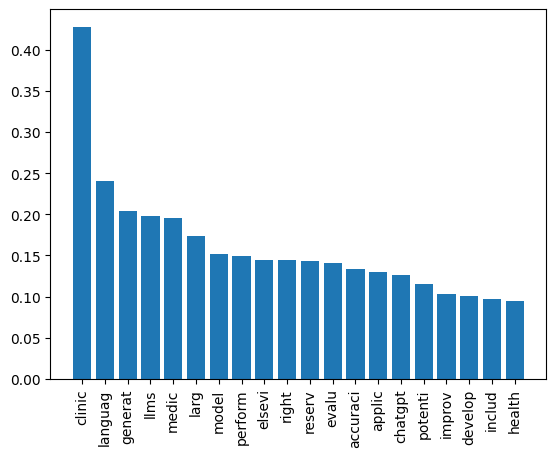

In [36]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

[Back to top](#0)

## WordClouds
WordCloud is a technique that shows which words are the most frequent among the given text.
we'll create wordcloud for all abstracts together using the top 75 words, based on the word frequencies dictionary:

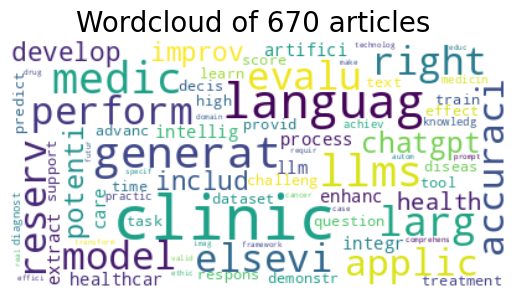

In [37]:
#width = 4000, height = 1000, random_state=77,
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(freqDist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud of "+str(len(df))+" articles ", fontsize=20)
plt.axis("off")
plt.show()

This representation allow us to understanding the data, to verify the preprocessing stage, ensuring we are on the right track or altertatively consider if any more preprocessing is necessary before training the model.

[Back to top](#0)

# <a id='8' style=color:black>8. Text Clustering with K-Means</a>

We have no prior knowledge with regards to the groups of our abstracts. In order to find structure in our unlabelled abstracts we should use unsupervised learning techniqe.

Here we will use k-means algorithm, a simple and popular unsupervised clustering algorithm, in order to find groups of similar abstracts in our corpus.

k-means algorithm calculate the distance between the points (abstracts) and group nearby abstracts together indicated that tey are similiar.

The K-Mean model will built with the KMeans function in the Python sklearn library.

## 'perform_k_means' function
This function Perform multiple K-means clustering.
In our case, the regular Kmeans implementation is too slow to run on laptop, so we use the MiniBatchKMeans algorithm. MiniBatchKMeans introduces some noise so we raised the batch and init sizes higher.
We also set the following parameters:
data - the dataset to run the K-means clustering on.
max_k – the maximum range of clusters
num_clusters - the number of clusters to set the 'n_clusters' parameter with
All other parameters remain the default values

After the k-means model object will created, the command fit will be used to get the trained model and predicted values.

Returned values:
model - the trained k-means model
predicted_vals - the predicted values, corresponding to each row in the given input dataset.


In [38]:
#Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, batch_size=2048, random_state=42, init_size=1400, n_init=20)
        kmeans_results.update( {k : kmeans.fit(data)} )
    return kmeans_results

## Create K-means models

In [39]:
# Feature weighting
X, tf_final, vectorizer = TfidFun(corpus)

In [40]:
#TARDA 5 MINUTOS PACIENCIA
# Running Kmeans 19 times from K=2 to K=20 in order to calculate different models of abstracts clustering
k = 20
kmeans_results = run_KMeans(k, tf_final)

In [41]:
# Saving the models
filename = 'finalized_kmean_model.sav'
joblib.dump(kmeans_results, filename)

['finalized_kmean_model.sav']

In [42]:
# load saved models from local directory
filename = 'finalized_kmean_model.sav'
kmeans_results = joblib.load(filename)

[Back to top](#0)

# <a id='9' style=color:black>9. Find the Optimal Number of Clusters</a>

Now we just have to figure out the optimal number of clusters to choose when running K-means algorithm using the given input parameters.
A good cluster is one with the distance between the points within the cluster less than the distance between points of two different clusters.

We evaluate for the optimal number of clusters using two predominant methods<br>
· Elbow method<br>
· Average Silhouette method

## Elbow method

In this method, we will calculate and plot the SSE for a range of cluster sizes and we will look for the value of  k  at which the total intra-cluster distance (SSE) tapers off, and creates line chart resembles an arm. the “elbow” (the point of inflection on the curve) is generally considered as an indicator of the appropriate number of clusters.

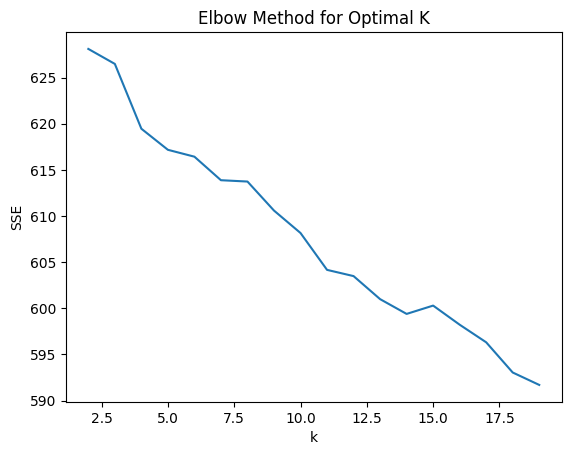

In [43]:
ks = range(2,20)
scores = []

for k in ks:
    scores.append(kmeans_results[k].inertia_)

plt.plot(ks, scores)
plt.title('Elbow Method for Optimal K')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

[Back to top](#0)

## Silhouette Score
Another method for clustering evaluation is silhouette_score. The silhouette value is a measure of how similar an abstract is to its own cluster (cohesion) compared to other clusters (separation).

In [44]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)


    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks

    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')

    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    minx=1
    maxx=-0.2
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        minx=min( minx,min(ith_cluster_silhouette_values) )
        maxx=max(maxx,max(ith_cluster_silhouette_values))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(minx, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    ax1.set_xlim([minx, maxx])
    ax1.set_xticks([round(minx+((maxx-minx)/5)*i,2) for i in range(6)])
    plt.show()


def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )

        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

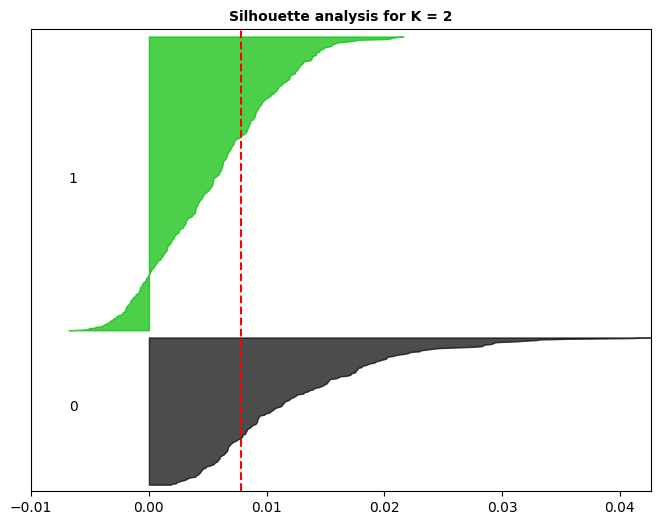

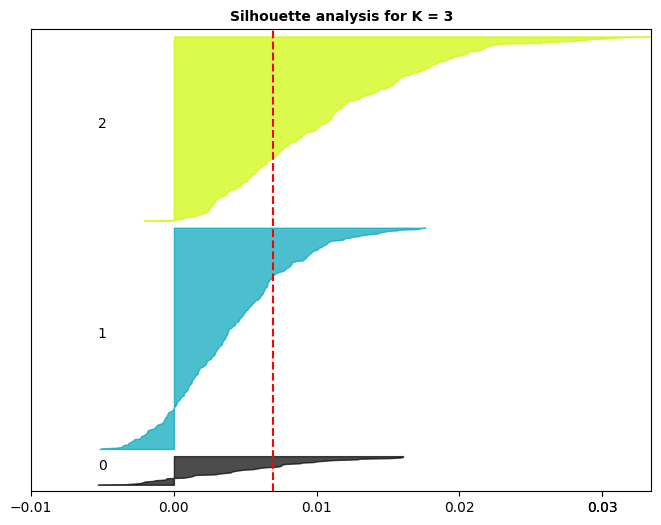

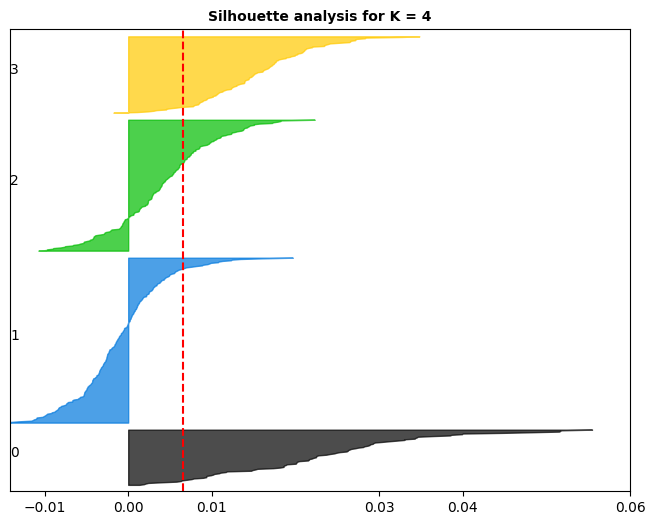

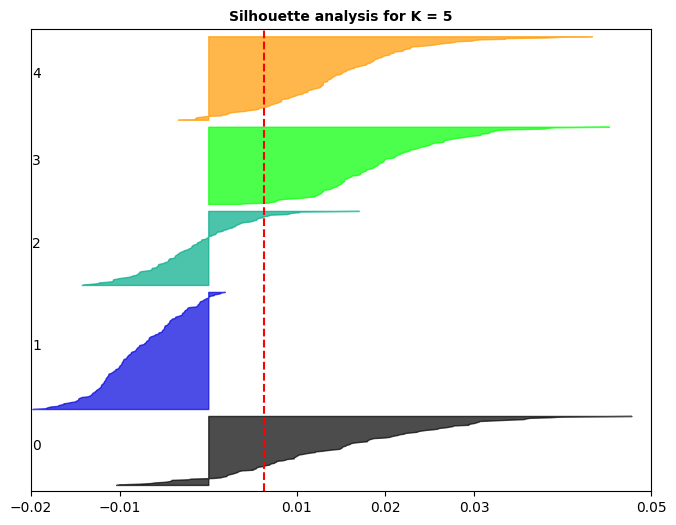

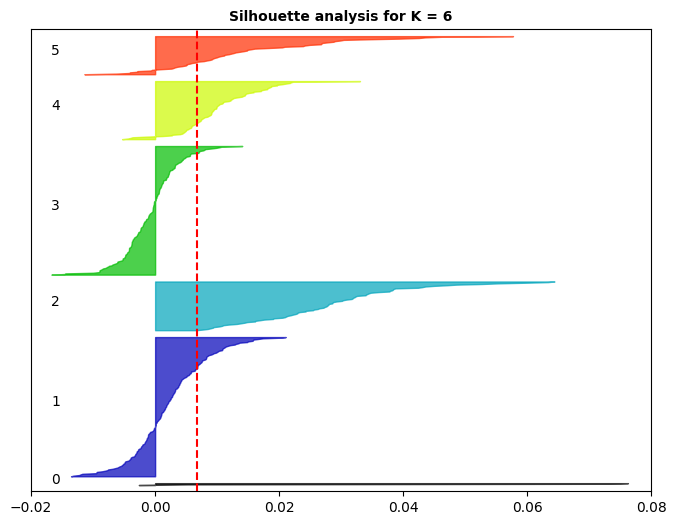

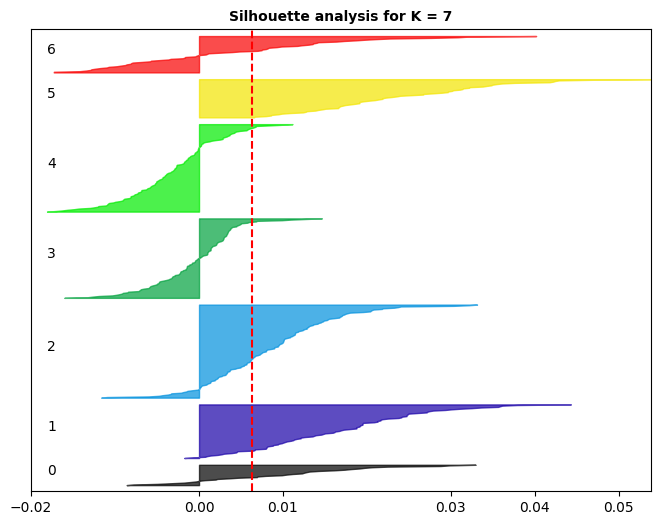

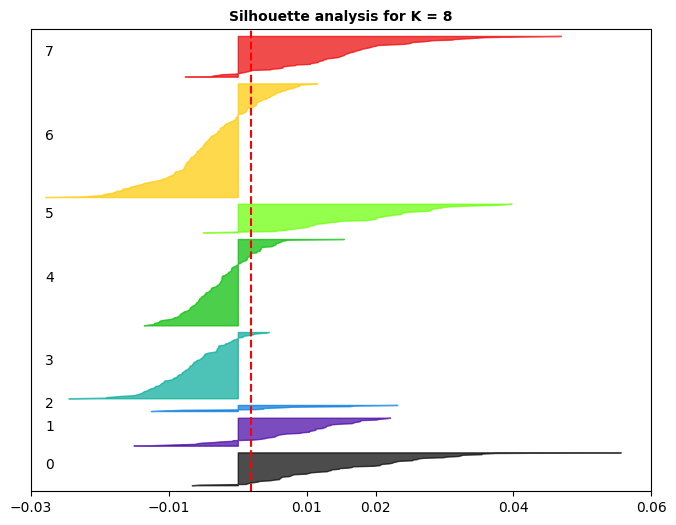

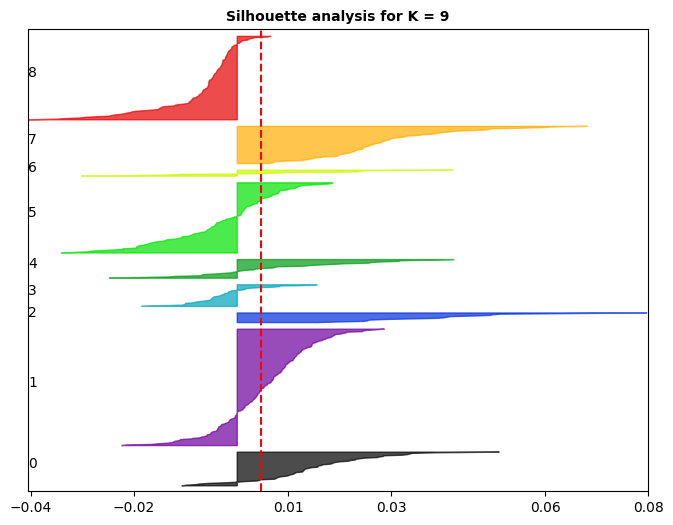

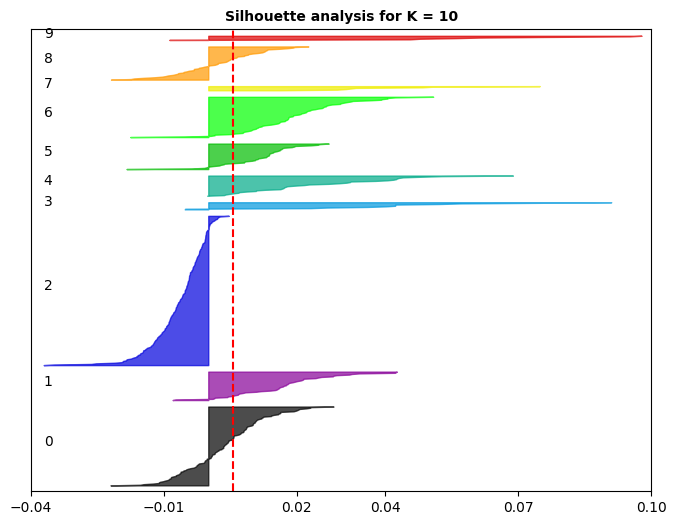

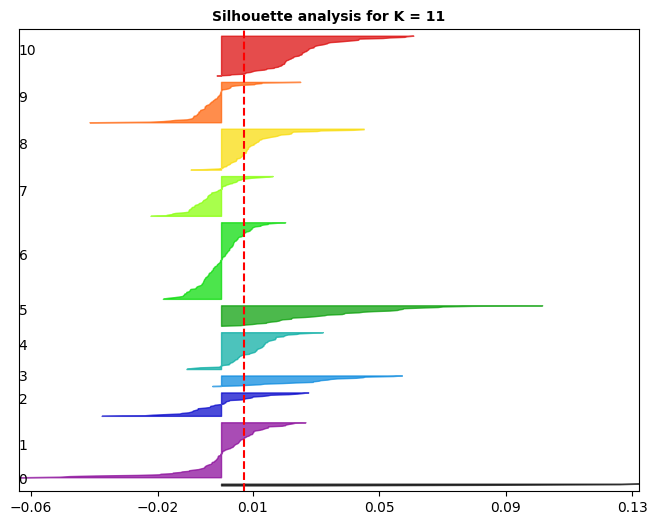

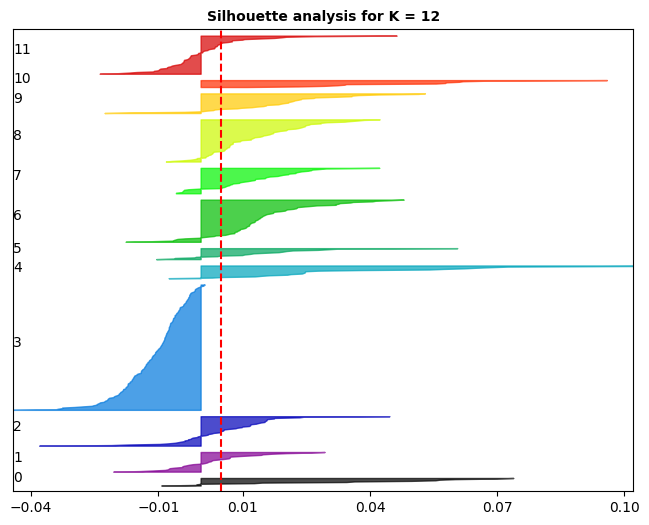

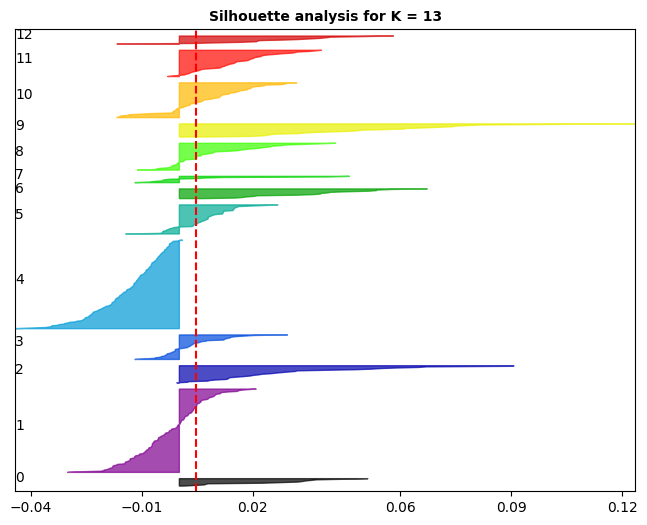

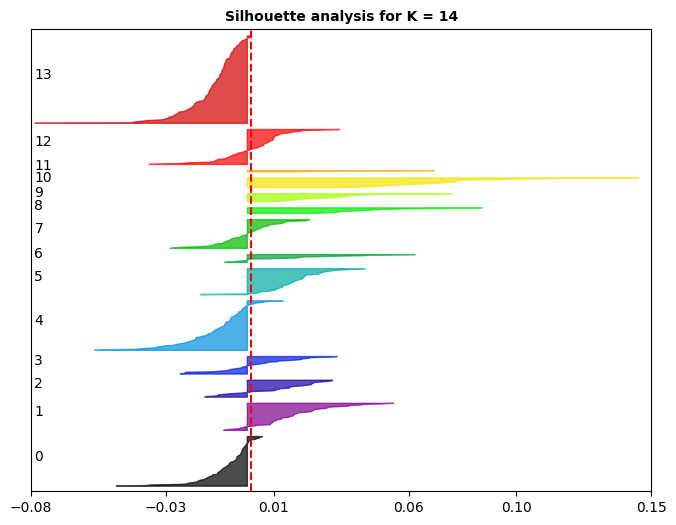

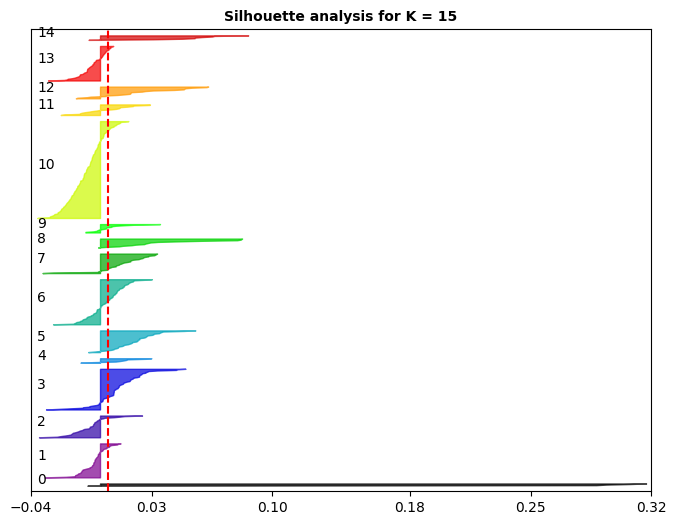

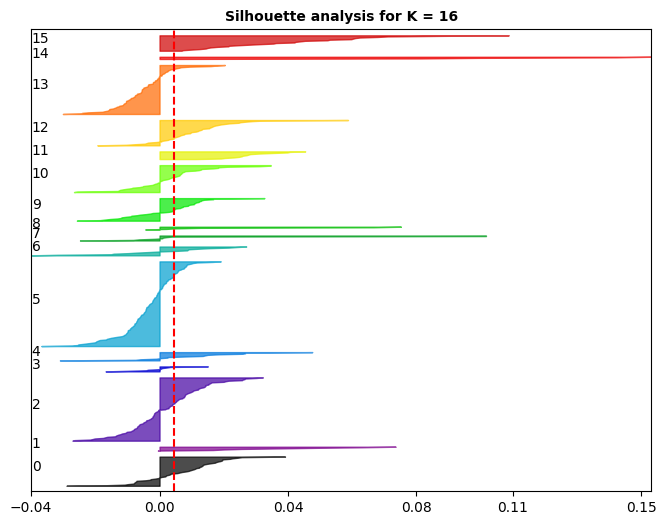

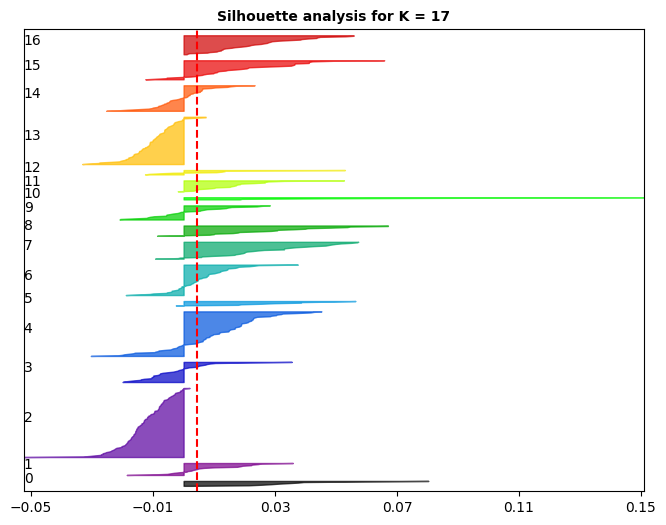

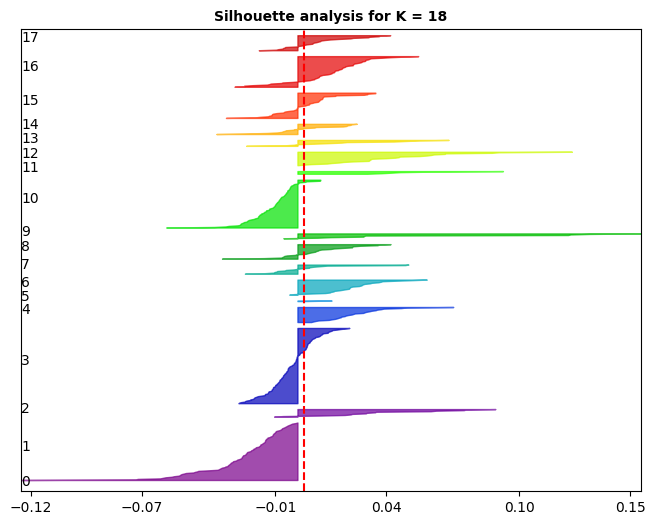

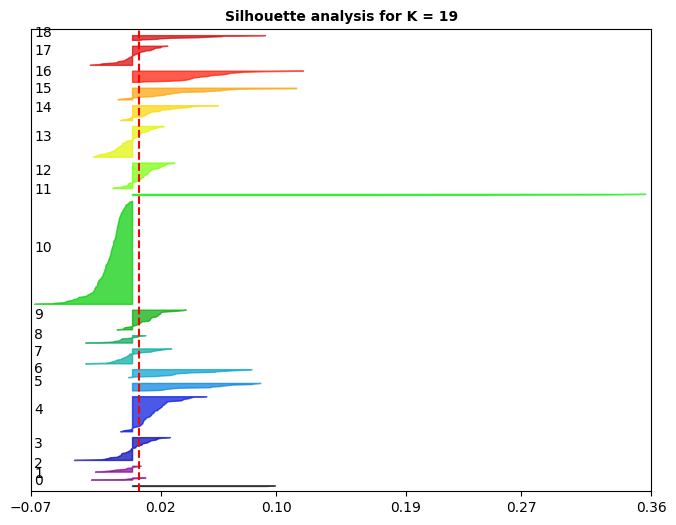

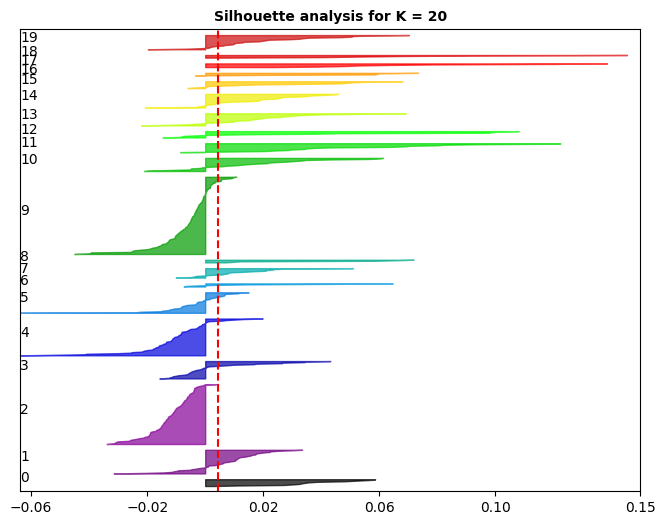

In [45]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, tf_final, plot=True)

Number of clusters= 2 	silhouette_score = 0.007797156466410225 

Number of clusters= 3 	silhouette_score = 0.00696026253645505 

Number of clusters= 4 	silhouette_score = 0.006540883826691948 

Number of clusters= 5 	silhouette_score = 0.006241026477866395 

Number of clusters= 6 	silhouette_score = 0.006794117805091739 

Number of clusters= 7 	silhouette_score = 0.0063629241820682275 

Number of clusters= 8 	silhouette_score = 0.001849775100602265 

Number of clusters= 9 	silhouette_score = 0.0047432541140392465 

Number of clusters= 10 	silhouette_score = 0.00556217693002269 

Number of clusters= 11 	silhouette_score = 0.0072243602239123565 

Number of clusters= 12 	silhouette_score = 0.004849908835823942 

Number of clusters= 13 	silhouette_score = 0.00459923339900268 

Number of clusters= 14 	silhouette_score = 0.001468728303708305 

Number of clusters= 15 	silhouette_score = 0.004663870208900697 

Number of clusters= 16 	silhouette_score = 0.004640219451018892 

Number of clusters

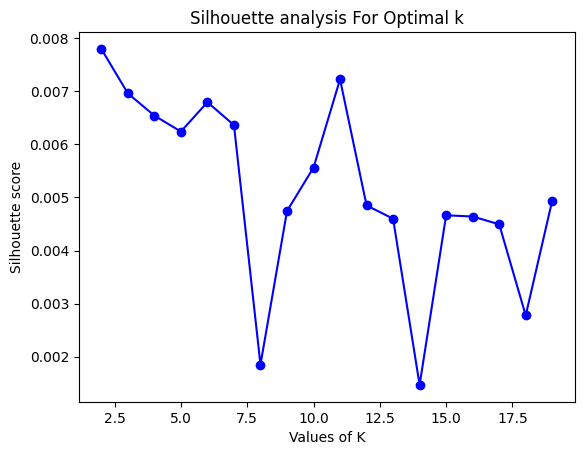

In [46]:
# Alternatively, uncomment the following to print only the Silhouette Score
ks = range(2,20)
silhouette_avg = []
for k in ks:
    kmeans = kmeans_results.get(k)
    tf_final_array = tf_final.to_numpy()
    prediction =  kmeans.predict(tf_final)
    print("Number of clusters=",k,"\tsilhouette_score =",silhouette_score(X, prediction),"\n")
    silhouette_avg.append(silhouette_score(X, prediction))
plt.plot(ks,silhouette_avg,"bo-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

[Back to top](#0)

## Text analysis for each cluster

We look at the clusters generated by k-means.
In order to evaluate the resulting categorization, ten top key words, based on their TFIDF score, are presented for each cluster.

In [47]:
#selecciona el numero de cluster que desees
best_result = 5 # 15 es el óptimo pero elegimos 5 por claridad

In [48]:
# Print the most dominant words in each cluster at the X clusters generated by k-means.

kmeans_best_result = kmeans_results.get(best_result)
words = vectorizer.get_feature_names_out()
common_words = kmeans_best_result.cluster_centers_.argsort()[:,-1:-15:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : chatgpt, respons, medic, educ, generat, question, clinic, potenti, chatbot, artifici, surgeri, intellig, accuraci, care
1 : clinic, languag, llms, larg, drug, llm, process, generat, health, applic, model, predict, learn, evalu
2 : model, accuraci, question, clinic, perform, imag, generat, medic, evalu, diagnost, score, languag, llms, radiolog
3 : clinic, llms, extract, languag, task, perform, larg, medic, tune, fine, match, domain, note, model
4 : healthcar, intellig, clinic, generat, artifici, medic, applic, care, develop, technolog, health, potenti, llms, challeng


[Back to top](#0)

## Visualisation of top words


In [49]:
# Produce simple bar plots to look at the most frequent words in each cluster
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(12, 6))
    for i in range(0, len(dfs)):
        plt.rcParams['font.size'] = '18'
        plt.figure(figsize=(12, 6))
        plt.title(("Most common words in Cluster {}".format(i)), fontsize=18, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()
        plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

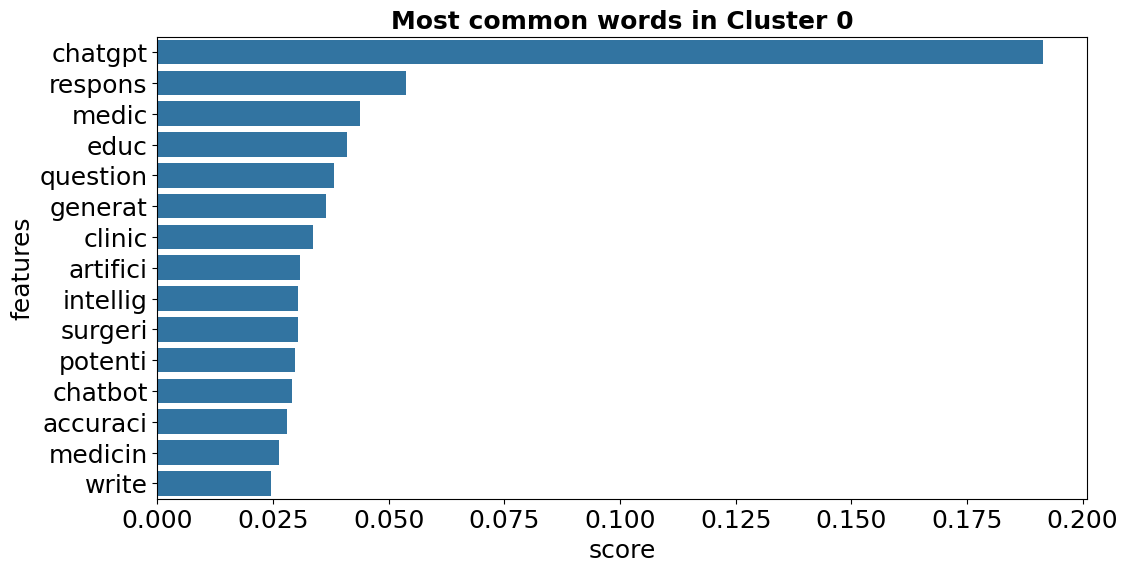

<Figure size 1200x600 with 0 Axes>

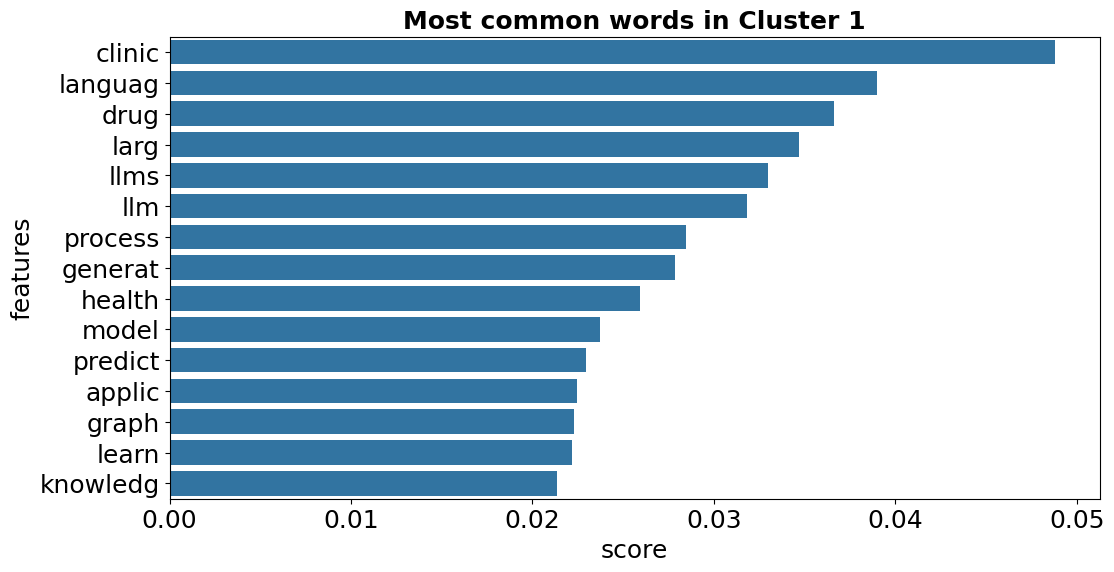

<Figure size 1200x600 with 0 Axes>

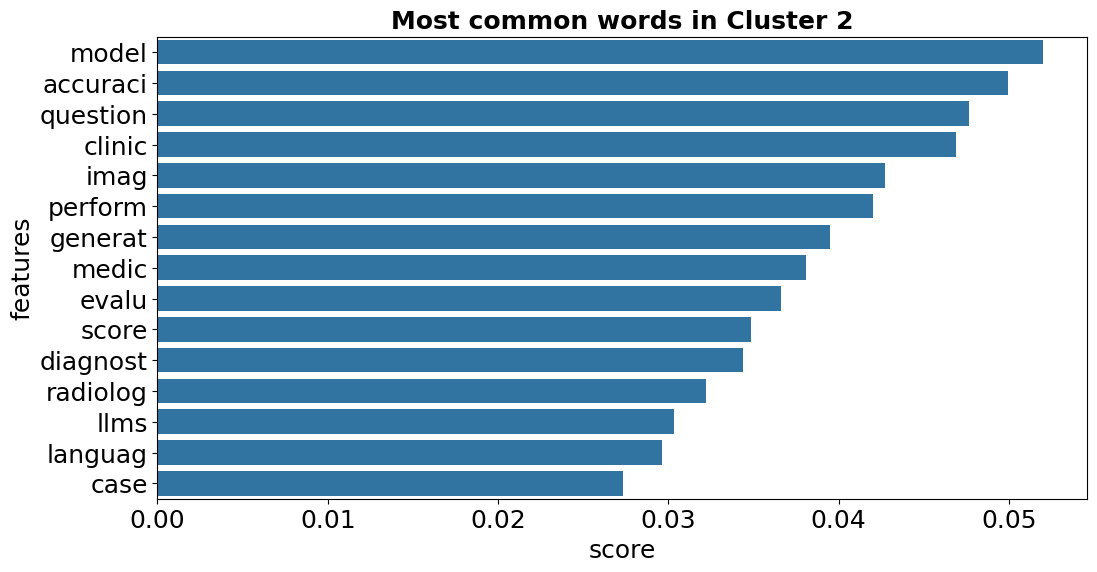

<Figure size 1200x600 with 0 Axes>

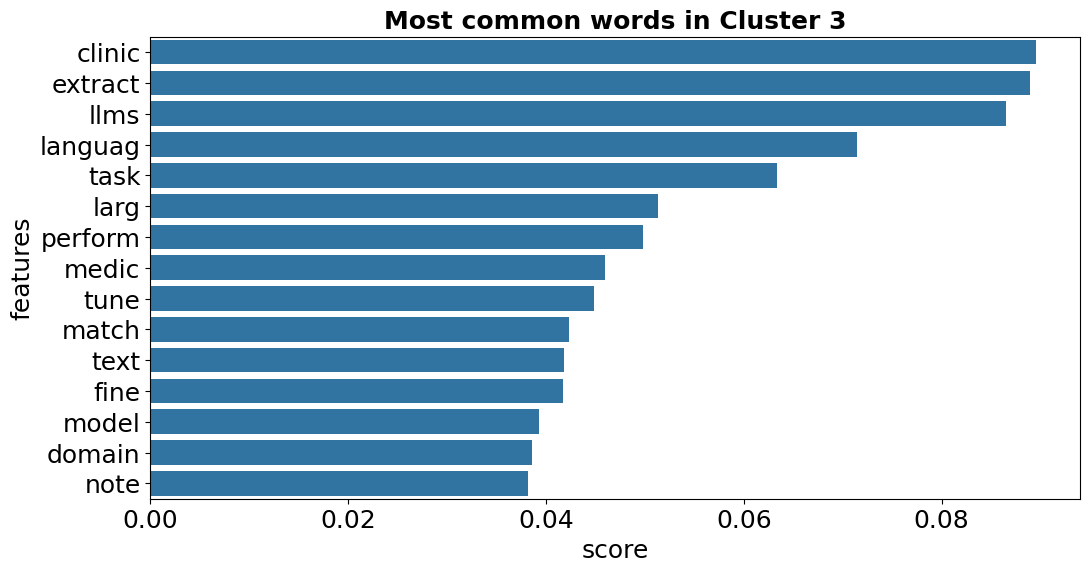

<Figure size 1200x600 with 0 Axes>

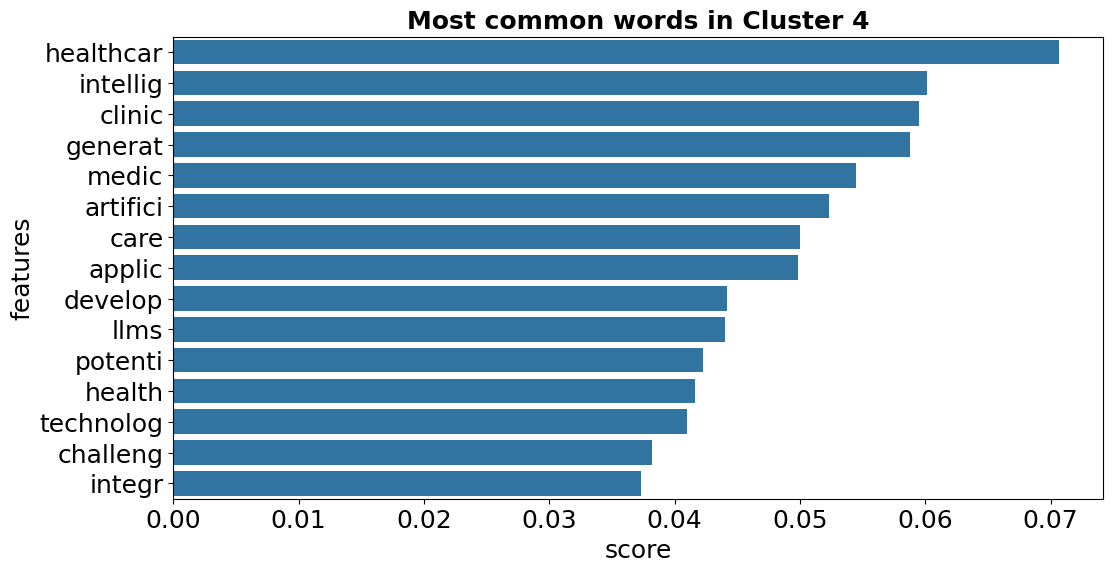

<Figure size 1200x600 with 0 Axes>

In [50]:
#tf_final_2 = tf_final.to_numpy()
prediction = kmeans_best_result.predict(tf_final.to_numpy())
n_feats = 15
dfs = get_top_features_cluster(tf_final.to_numpy(), prediction, n_feats)
plotWords(dfs, 15);

[Back to top](#0)

## Map of Words
On the graphs above we can see the score of the best words in each cluster. Making a map of words allow us to visulize the text data in a nice way by display the key words that are closely related to the cluster concept.

In [51]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

# Function that generate the WordClouds
def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

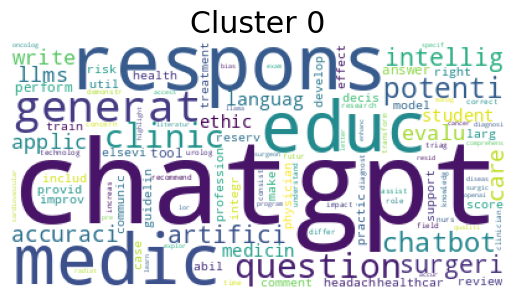

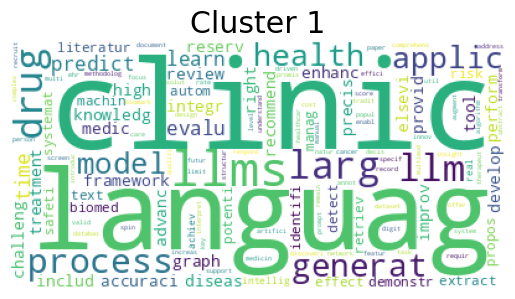

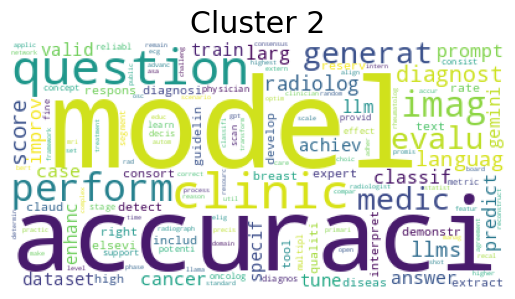

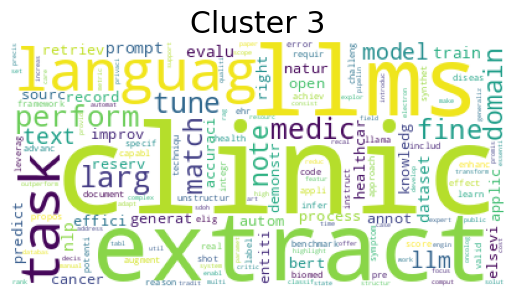

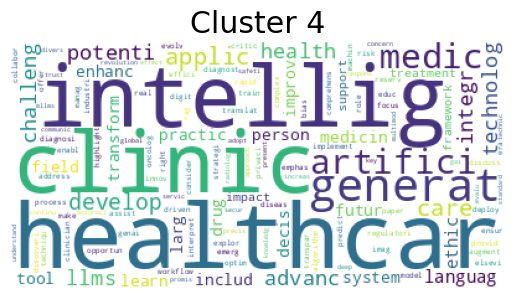

In [52]:
centroids = pd.DataFrame(kmeans_best_result.cluster_centers_)
centroids.columns = tf_final.columns
generateWordClouds(centroids)

[Back to top](#0)

# <a id='10' style=color:black>10. Auto-tagging based on cluster centers</a>

If we are satisfied with our clustering, we should assign which abstract belongs to which group. <br>
Kmeans algorithm generates cluster labels, which represent the abstracts contained in these clusters.

In [53]:
# Assigning the cluster labels to each abstract
df['Category'] = kmeans_best_result.labels_ # the last column you can see the label numebers
df.tail(5)
df_final['Cluster']=kmeans_best_result.labels_

### Saving data to CSV file (Optionally)
One can choose to save the dataframe in .csv files for faster access during computational analyses.<br>
We'll use pandas to save the DataFrame to csv file

In [54]:
df_final.to_excel('abstract_by_cluster.xlsx')
# Uncomment the following to save the file

### Loading data (Optionally)

We'll use pandas to read the csv file contaning the titles and abstracts for each PMID.


In [55]:
#df = pd.read_csv('abstract_by_cluster.csv')
#df.head()
# Uncomment the following to load cistus abstracts data

# <a id='11' style=color:black>11. Plotting clusters</a>
Each abstract labeled by number of cluster in the dataframe. To to visualize the K-Means clustering results, we used PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot. Each cluster represente by different colors.

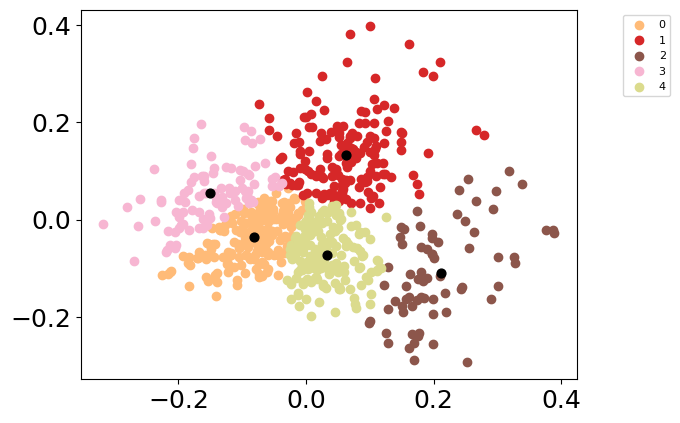

In [64]:
#Load Data
data = tf_final
pca = PCA(3) # Changed to 3 components for 3D visualization

#Transform the data
dfp = pca.fit_transform(data)

# Assign PCA results to new columns with unique names in df_final
df_final['pca_x'] = dfp[:, 0]
df_final['pca_y'] = dfp[:, 1]
df_final['pca_z'] = dfp[:, 2] # Added the third component


#Initialize the class object
kmeans = kmeans_best_result

#predict the labels of clusters.
label = kmeans.fit_predict(dfp[:,:2]) # Predict using only the first two components for consistency with the 2D plot if needed later

#Getting the Centroids
# Note: Centroids here are still based on the 2D PCA for the 2D plot
# If a 3D representation of centroids is needed, PCA should be applied to centroids as well.
centroids = kmeans_best_result.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
cmap = plt.get_cmap("tab20")
category_colors = cmap(
        np.linspace(0.15, 0.85, best_result))

# This plot is still 2D, the 3D plot will be generated in the next cell
for i in u_labels:
    plt.scatter(dfp[label == i , 0] , dfp[label == i , 1] , label = i, color=category_colors[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'k')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.show()

[Back to top](#0)

In [65]:
import plotly.express as px
# Create a 3D scatter plot
fig = px.scatter_3d(df_final, x="pca_x", y="pca_y", z="pca_z", color="Cluster",
                    hover_name="Title", # Use Title for hover information
                    hover_data={"pca_x": False, "pca_y": False, "pca_z": False, "Title": False}) # Hide default hover data

fig.update_layout(title='3D Cluster Visualization') # Add a title
fig.show()

## Frequency counts

In [61]:
# How many abstracts belong to each cluster -> using group by in pandas
df.groupby(['Category'])['Year'].count()

,Year
Category,
0,110
1,186
2,118
3,123
4,133


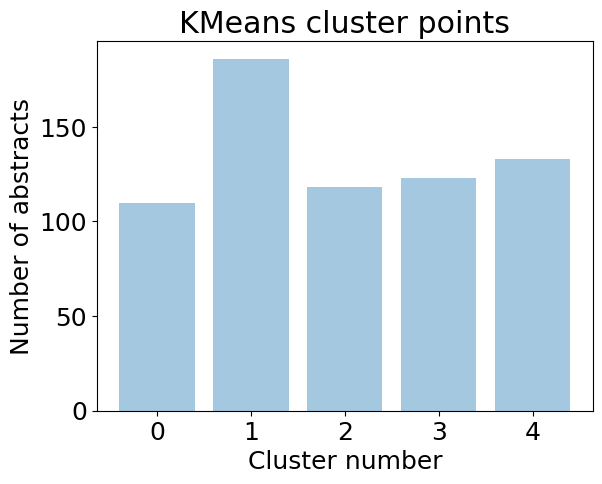

In [62]:
# visually how many abstracts are distributed across the clusters
import matplotlib.pyplot as plt
plt.bar([x for x in range(best_result)], df.groupby(['Category'])['Year'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of abstracts")
plt.show()

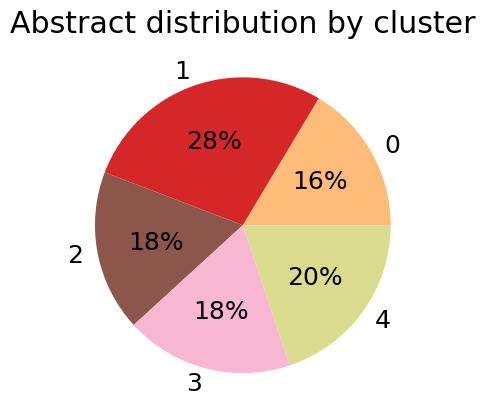

In [63]:
#add colors

#colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive']
cmap = plt.get_cmap("tab20")

category_colors = cmap(
        np.linspace(0.15, 0.85, best_result))

df.groupby(['Category'])['Year'].count().plot.pie(colors=category_colors,autopct='%1.0f%%')
#df.groupby(['Category'])['Year'].count().plot.pie(colors=colors,autopct='%1.0f%%')
plt.title("Abstract distribution by cluster")
plt.ylabel("")
plt.savefig('pie.png')

[Back to top](#0)

# <a id='12' style=color:black>12. Distribution of clusters over the last years</a>

In [71]:
# Here are some commands to prepere dataframe to be input to the graph of distribution of clusters by years
# group df by year
dfy = df.groupby(['Year','Category'])['Title'].count().to_frame()
dfy.reset_index(inplace=True)
# Create pivot table such as the category will be the variable (columns)
dfy_pv = dfy.pivot_table('Title','Year', 'Category')
# Calculate percentage
dfy_pv = dfy_pv.div(dfy_pv.sum(axis=1), axis=0)*100
dfy_pv.reset_index(level=0, inplace=True)
# No abstracts in the category at scpesic year will have zero value
dfy_pv = dfy_pv.fillna(0)
dfy_pv

Category,Year,0,1,2,3,4
0,2023,39.215686,19.607843,0.000000,27.450980,13.725490
1,2024,19.634703,21.917808,16.894977,20.547945,21.004566
2,2025,12.207792,31.948052,20.779221,15.584416,19.480519
3,2026,0.000000,33.333333,6.666667,26.666667,33.333333


In [72]:
def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('tab20')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9,
                label=colname, color=color)
        xcenters = starts + widths / 2


    ax.legend(ncol=1, bbox_to_anchor=(1, 0.5),
              loc='center left', fontsize='large')

    return fig, ax


In [73]:
df["Year"]=df["Year"].astype(int)

In [74]:
df["Year"].unique()

array([2026, 2025, 2024, 2023])

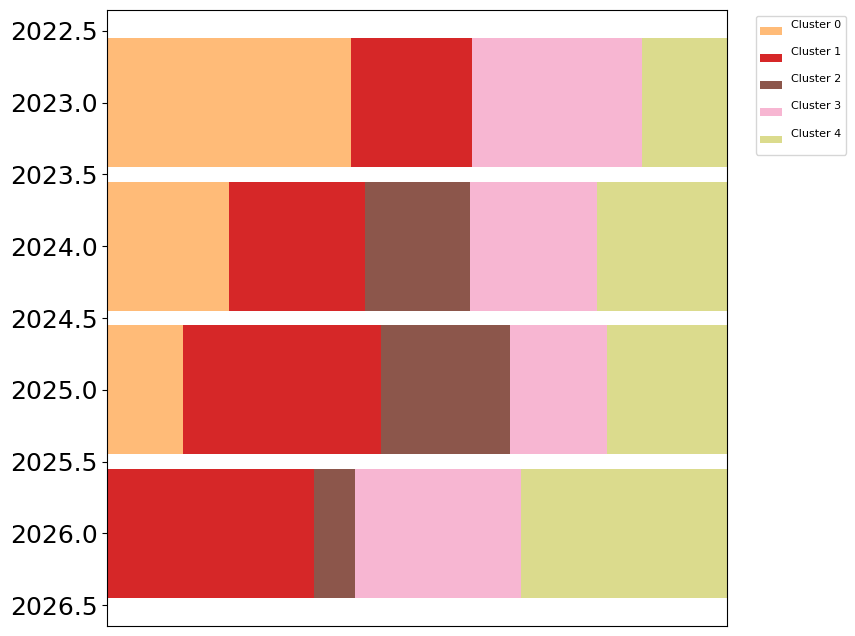

In [75]:
category_names = ['Cluster 0\n', 'Cluster 1\n', 'Cluster 2\n', 'Cluster 3\n', 'Cluster 4\n', 'Cluster 5\n', 'Cluster 6\n', 'Cluster 7\n','Cluster 8\n', 'Cluster 9\n', 'Cluster 10\n', 'Cluster 11\n', 'Cluster 12\n', 'Cluster 13\n', 'Cluster 14\n', 'Cluster 15\n', 'Cluster 16\n','Cluster 17\n', 'Cluster 18\n', 'Cluster 19\n']
results = dfy_pv.set_index('Year').T.to_dict('list')
#key_order = ['2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002', '2001']
key_order=df["Year"].unique()
results = {k : results[k] for k in key_order if k > 1999}

survey(results, category_names)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.savefig('bar.png', bbox_inches='tight')#
plt.show()

[Back to top](#0)

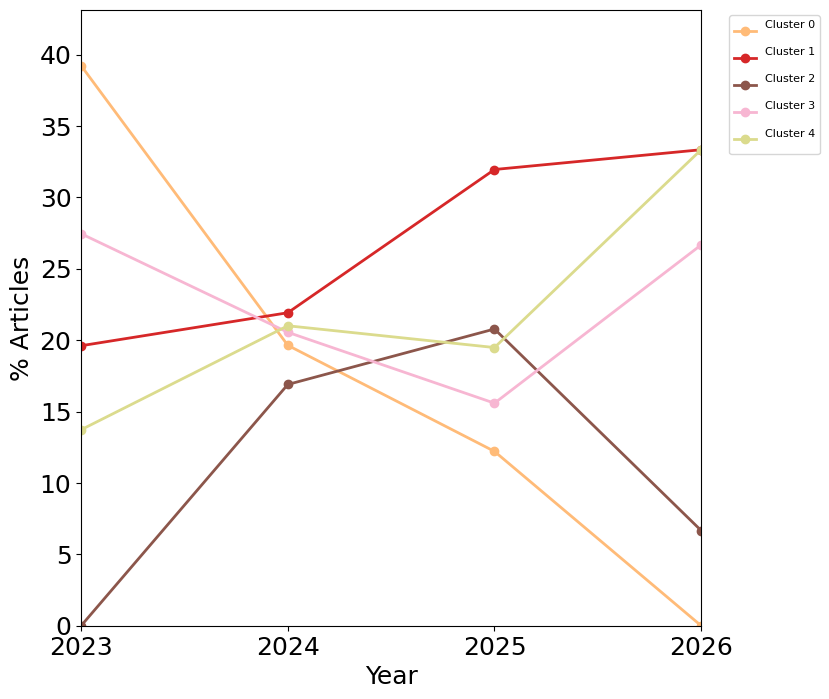

In [76]:
def survey2(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values())) # Removed the transpose here
    category_colors = plt.get_cmap('tab20')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(min(labels), max(labels)) # adjust x-axis limits based on actual data range
    ax.set_xticks(labels) # adjust x-axis ticks based on actual data points
    ax.set_xticklabels(labels) # adjust x-axis labels based on actual data points
    ax.set_ylim(0, np.max(data) * 1.1) # adjust y-axis limits according to the value range

    for i, colname in enumerate(category_names): # Iterate through categories
        ax.plot(labels, data[:, i], marker='o', linewidth=2, # Plot each category against years
                label=colname, color=category_colors[i])


    ax.legend(ncol=1, bbox_to_anchor=(1, 0.5),
              loc='center left', fontsize='large')

    ax.set_title('')
    ax.set_xlabel('Year')
    ax.set_ylabel('% Articles')

    return fig, ax

df["Year"] = df["Year"].astype(int)
key_order = sorted(df["Year"].unique())

results = dfy_pv.set_index('Year').T.to_dict('list')
results = {k : results[k] for k in key_order if k > 1999}
category_names = [f'Cluster {i}\n' for i in range(dfy_pv.shape[1]-1)] # Dynamically generate cluster names based on dfy_pv columns
cmap = plt.get_cmap("tab20")

survey2(results, category_names)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.savefig('line.png', bbox_inches='tight')
plt.show()

# <a id='13'>13. Conclusions</a>

[Back to top](#0)